In [1]:
#!pip install scikit-plot

In [2]:
pip install imbalanced-learn

ImportError: cannot import name '_MissingValues' from 'sklearn.utils._param_validation' (C:\Users\visha\anaconda3\Lib\site-packages\sklearn\utils\_param_validation.py)

In [2]:
#pip install xgboost

In [5]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns
from sklearn import model_selection
#from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
#from xgboost.xgbclassifier import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score,classification_report,precision_score,recall_score,f1_score,confusion_matrix
import nltk
#import scikitplot as skplt
import re
from nltk.corpus import stopwords

In [4]:
data = pd.read_csv("spam_new_mod.csv",encoding='latin-1',names=['label','content'])

In [5]:
data

,label,content
0,0,Jason says it's cool if we pick some up from h...
1,0,Bring home some Wendy =D
2,1,Reply to win Â£100 weekly! Where will the 2006...
3,0,happened here while you were adventuring
4,0,"Aight, we'll head out in a few"
...,...,...
2107,1,PRIVATE! Your 2004 Account Statement for 07742...
2108,0,Ok i go change also...
2109,1,Talk sexy!! Make new friends or fall in love i...
2110,1,You are being contacted by our dating service ...


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,2112.0,0.541667,0.498379,0.0,0.0,1.0,1.0,1.0


In [7]:
data.describe()

,label
count,2112.000000
mean,0.541667
std,0.498379
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [8]:
data.dtypes

label       int64
content    object
dtype: object

In [9]:
data.isnull().sum()

label      0
content    0
dtype: int64

In [10]:
data.isna().sum()

label      0
content    0
dtype: int64

In [11]:
#data = data.dropna()

In [12]:
data.isna().sum()

label      0
content    0
dtype: int64

In [13]:
#data["Category"]=data["Category"].map({'spam':1,'ham':0})

In [14]:
data['label'].value_counts()

label
1    1144
0     968
Name: count, dtype: int64

<Axes: xlabel='label'>

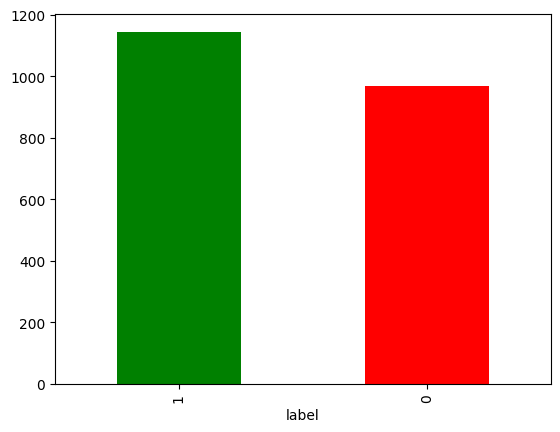

In [15]:
count_Class=pd.value_counts(data["label"], sort= True)
count_Class.plot(kind = 'bar',color = ["green","red"])


In [16]:
#pip install nltk

In [17]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')
STOPWORDS = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\visha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
import re

In [19]:
def clean_text(text):
    #text = text.lower()
    text = re.sub(r'[^0-9a-zA-Z]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    text = " ".join(word for word in text.split() if word not in STOPWORDS)
    return text

In [20]:
data['clean_text'] = data['content'].apply(clean_text)
data.head()

,label,content,clean_text
0,0,Jason says it's cool if we pick some up from h...,Jason says cool pick place like hour
1,0,Bring home some Wendy =D,Bring home Wendy D
2,1,Reply to win Â£100 weekly! Where will the 2006...,Reply win 100 weekly Where 2006 FIFA World Cup...
3,0,happened here while you were adventuring,happened adventuring
4,0,"Aight, we'll head out in a few",Aight head


In [21]:
x = data['clean_text']
y = data['label']

In [22]:
x

0                    Jason says cool pick place like hour
1                                      Bring home Wendy D
2       Reply win 100 weekly Where 2006 FIFA World Cup...
3                                    happened adventuring
4                                              Aight head
                              ...                        
2107    PRIVATE Your 2004 Account Statement 0774267696...
2108                                    Ok go change also
2109    Talk sexy Make new friends fall love worlds di...
2110    You contacted dating service someone know To f...
2111          What feathery bowa Is something guys I know
Name: clean_text, Length: 2112, dtype: object

In [23]:
y

0       0
1       0
2       1
3       0
4       0
       ..
2107    1
2108    0
2109    1
2110    1
2111    0
Name: label, Length: 2112, dtype: int64

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect=TfidfVectorizer(min_df=1,stop_words='english')

In [25]:
X = vect.fit_transform(x)

In [26]:
X=pd.DataFrame(X.toarray())
X

,0,1,2,3,4,5,6,7,8,9,...,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
### Separating Columns
x_train = X.iloc[:600]
x_test = X.iloc[601:]
y_train = y.iloc[:600]
y_test = y.iloc[601:]
#target = df['class_label']
#df_train['class_label'] = target

#Y = df_train['class_label']
#X = df_train

# splitting training data into train and validation using sklearn
#from sklearn import model_selection
#X_train,X_test,y_train,y_test = model_selection.train_test_split(X,Y,test_size=.2, random_state=42)

In [28]:
#x_train, x_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)
#print([np.shape(x_train), np.shape(x_test)])

In [29]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
x_test

,0,1,2,3,4,5,6,7,8,9,...,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823
601,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
602,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
603,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
604,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y_train

0      0
1      0
2      1
3      0
4      0
      ..
595    0
596    0
597    1
598    0
599    1
Name: label, Length: 600, dtype: int64

In [32]:
y_test

601     1
602     0
603     1
604     1
605     1
       ..
2107    1
2108    0
2109    1
2110    1
2111    0
Name: label, Length: 1511, dtype: int64

##Support Vector Modelling

In [33]:
svm = SVC(C=100, kernel='poly')
svm.fit(x_train,y_train)
model_prediction =  svm.predict(x_test)
print("accuracy score:" , accuracy_score(y_test , model_prediction,))
print("precision score:" , precision_score(y_test , model_prediction,average='macro'))
print("recall:" , recall_score(y_test , model_prediction,average='macro'))
print("f1 score:" , f1_score(y_test , model_prediction,average='macro'))

accuracy score: 0.71343481138319
precision score: 0.8073843416370107
recall: 0.7359756097560975
f1 score: 0.7013459137583563


In [34]:
gamma = [0.1, 1,10,20,50,100,200,250,500]
for i in range(len(gamma)):
    svm = SVC(C=100.0,kernel='rbf',degree=3,gamma=gamma[i],verbose=True,random_state=100)
    svm.fit(x_train,y_train)
    model_prediction =  svm.predict(x_test)
    print("accuracy score:" , accuracy_score(y_test , model_prediction))

[LibSVM]accuracy score: 0.9583057577763071
[LibSVM]accuracy score: 0.9616148246194574
[LibSVM]accuracy score: 0.5526141628060887
[LibSVM]accuracy score: 0.5526141628060887
[LibSVM]accuracy score: 0.5526141628060887
[LibSVM]accuracy score: 0.5526141628060887
[LibSVM]accuracy score: 0.5526141628060887
[LibSVM]accuracy score: 0.5526141628060887
[LibSVM]accuracy score: 0.5526141628060887


##Decision Tree Classification

In [35]:
decision_tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
decision_tree.fit(x_train,y_train)
y_pred_DTModel = decision_tree.predict(x_test)
print("accuracy score:" , accuracy_score(y_test , y_pred_DTModel))
print("precision score:" , precision_score(y_test , y_pred_DTModel,average='macro'))
print("recall:" , recall_score(y_test , y_pred_DTModel,average='macro'))
print("f1 score:" , f1_score(y_test , y_pred_DTModel,average='macro'))
print("Confusion Matrix:" , confusion_matrix(y_test , y_pred_DTModel))

accuracy score: 0.7908669755129054
precision score: 0.8333015982920777
recall: 0.8058372454202111
f1 score: 0.7884653553074605
Confusion Matrix: [[678  13]
 [303 517]]


##Random Forest Classification

In [36]:
model_randomForest = RandomForestClassifier(n_estimators=130,max_depth = 20,random_state=101)
model_randomForest.fit(x_train,y_train)
y_pred_randFor = model_randomForest.predict(x_test)
print("accuracy score:" , accuracy_score(y_test , y_pred_randFor))
print("precision score:" , precision_score(y_test , y_pred_randFor,average='macro'))
print("recall:" , recall_score(y_test , y_pred_randFor,average='macro'))
print("f1 score:" , f1_score(y_test , y_pred_randFor,average='macro'))
print("Confusion Matrix:" , confusion_matrix(y_test , y_pred_randFor))

accuracy score: 0.9483785572468564
precision score: 0.9485859403470411
recall: 0.9518698598708129
f1 score: 0.9482942879705185
Confusion Matrix: [[686   5]
 [ 73 747]]


##K- Neareast Neighbours Classification

In [37]:
model_KnNeigh = KNeighborsClassifier(n_neighbors=20,metric='euclidean')
model_KnNeigh.fit(x_train,y_train)
y_pred_knn = model_KnNeigh.predict(x_test)
print("accuracy score:" , accuracy_score(y_test , y_pred_knn))
print("precision score:" , precision_score(y_test , y_pred_knn,average='macro'))
print("recall:" , recall_score(y_test , y_pred_knn,average='macro'))
print("f1 score:" , f1_score(y_test , y_pred_knn,average='macro'))
print("Confusion Matrix:" , confusion_matrix(y_test , y_pred_knn))

accuracy score: 0.827928524156188
precision score: 0.8508610567514677
recall: 0.8164201757791818
f1 score: 0.8204183503684335
Confusion Matrix: [[471 220]
 [ 40 780]]


In [38]:
from xgboost import XGBClassifier

##XGBoost Classification

In [39]:
model_xgboost = XGBClassifier()
model_xgboost.fit(x_train,y_train)
y_pred_xgb = model_xgboost.predict(x_test)
print("accuracy score:" , accuracy_score(y_test , y_pred_xgb))
print("precision score:" , precision_score(y_test , y_pred_xgb,average='macro'))
print("recall:" , recall_score(y_test , y_pred_xgb,average='macro'))
print("f1 score:" , f1_score(y_test , y_pred_xgb,average='macro'))
print("Confusion Matrix:" , confusion_matrix(y_test , y_pred_xgb))

accuracy score: 0.9305095962938451
precision score: 0.9296940743338009
recall: 0.9325606226395116
f1 score: 0.9302941699819645
Confusion Matrix: [[661  30]
 [ 75 745]]


In [40]:
pip install keras

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [41]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import tensorflow as tf

In [43]:
X_train = x_train.toarray()
X_test = x_test.toarray()

AttributeError: 'DataFrame' object has no attribute 'toarray'

In [44]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report

# Define the input shape and number of classes
input_shape = (x_train.shape[1],)
num_classes = len(np.unique(y_train))

# Define the model architecture
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=input_shape))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with an optimizer, loss function, and metrics
optimizer = Adam(lr=0.001)
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data
batch_size = 50
epochs = 10
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss: {loss:.4f}')
print(f'Test accuracy: {accuracy:.4f}')

# Classify target variables prediction
y_pred_prob = model.predict(x_test)
y_pred = np.argmax(y_pred_prob, axis=1)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Epoch 1/10
12/12 - 1s - loss: 0.6849 - accuracy: 0.6233 - val_loss: 0.6697 - val_accuracy: 0.6539 - 1s/epoch - 114ms/step
Epoch 2/10
12/12 - 0s - loss: 0.6330 - accuracy: 0.8867 - val_loss: 0.6162 - val_accuracy: 0.9126 - 153ms/epoch - 13ms/step
Epoch 3/10
12/12 - 0s - loss: 0.5334 - accuracy: 0.9767 - val_loss: 0.5168 - val_accuracy: 0.9523 - 154ms/epoch - 13ms/step
Epoch 4/10
12/12 - 0s - loss: 0.3830 - accuracy: 0.9883 - val_loss: 0.3875 - val_accuracy: 0.9603 - 160ms/epoch - 13ms/step
Epoch 5/10
12/12 - 0s - loss: 0.2325 - accuracy: 0.9883 - val_loss: 0.2707 - val_accuracy: 0.9636 - 165ms/epoch - 14ms/step
Epoch 6/10
12/12 - 0s - loss: 0.1213 - accuracy: 0.9950 - val_loss: 0.1970 - val_accuracy: 0.9629 - 146ms/epoch - 12ms/step
Epoch 7/10
12/12 - 0s - loss: 0.0624 - accuracy: 0.9967 - val_loss: 0.1578 - val_accuracy: 0.9623 - 150ms/epoch - 12ms/step
Epoch 8/10
12/12 - 0s - loss: 0.0379 - accuracy: 0.9983 - val_loss: 0.1382 - val_accuracy: 0.9649 - 152ms/epoch - 13ms/step
Epoch 9/10

In [45]:
 # importing MLPclassifier
# Train an ANN classifier with 5 hidden layers
clf = MLPClassifier(hidden_layer_sizes=(15, 10, 10))
clf.fit(x_train,y_train) ##fitting the model
# Predicting on the test set
y_pred = clf.predict(x_test)

# Calculating accuracy
neural_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy of Neural network:", neural_accuracy) ## accuracy of neural network

Accuracy of Neural network: 0.9629384513567174


In [ ]:
pip install SpeechRecognition

In [ ]:
pip install pyttsx3

##Speech Recognization

In [ ]:
import speech_recognition as sr
import pyttsx3

In [ ]:
# Initialize the recognizer
r = sr.Recognizer()

In [ ]:
# Function to convert text to
# speech
def SpeakText(command):
     
    # Initialize the engine
    engine = pyttsx3.init()
    engine.say(command)
    engine.runAndWait()
     
     
# Loop infinitely for user to
# speak
 
#while(1):   
     
    # Exception handling to handle
    # exceptions at the runtime
   # try:
         
        # use the microphone as source for input.
with sr.Microphone() as source2:
             
            # wait for a second to let the recognizer
            # adjust the energy threshold based on
            # the surrounding noise level
            r.adjust_for_ambient_noise(source2, duration= 1)
             
            #listens for the user's input
            audio2 = r.listen(source2)
             
            # Using google to recognize audio
            MyText = r.recognize_google(audio2)
            MyText = MyText.lower()
 
            print("Did you say ",MyText)
            SpeakText(MyText)
             
    #except sr.RequestError as e:
       # print("Could not request results; {0}".format(e))
         
    #except sr.UnknownValueError:
     #   print("unknown error occurred")

In [52]:
MyText = input("Please enter your message\n")

Please enter your message
To get free pass to hollywood click here


In [53]:
message = [MyText]
dataset = {'message': message}
data = pd.DataFrame(dataset)

In [54]:
data["message"] = data["message"].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$', 'emailaddress')
data["message"] = data["message"].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$', 'webaddress')
data["message"] = data["message"].str.replace(r'£|\$', 'money-symbol')
data["message"] = data["message"].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$', 'phone-number')#data["message"] = data["message"].str.replace(r'\d+(\.\d+)?', 'number')
data["message"] = data["message"].str.replace(r'[^\w\d\s]', ' ')
data["message"] = data["message"].str.replace(r'\s+', ' ')
data["message"] = data["message"].str.replace(r'^\s+|\s*?$', ' ')
data["message"] = data["message"].str.lower()

stop_words = set(stopwords.words('english'))
data["message"] = data["message"].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))
ss = nltk.SnowballStemmer("english")
data["message"] = data["message"].apply(lambda x: ' '.join(ss.stem(term)for term in x.split()))


In [55]:
tfidf_vec = vect.transform(data["message"])
tfidf_data = pd.DataFrame(tfidf_vec.toarray())
#my_prediction = model.predict(tfidf_data)
y_pred_ML = clf.predict(tfidf_data)
tfidf_data

,0,1,2,3,4,5,6,7,8,9,...,4814,4815,4816,4817,4818,4819,4820,4821,4822,4823
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
y_pred_ML

array([1], dtype=int64)

In [ ]:
type(stt)

In [ ]:
stt = vect.fit_transform(stt)

In [ ]:
y_pred = decision_tree.predict(stt)

In [ ]:
predict_msg = ["You are awarded a Nikon Digital Camera. Call now"]

In [ ]:
def predict_spam(predict_msg):
    new_seq = tokenizer.texts_to_sequences(predict_msg)
    padded = pad_sequences(new_seq, maxlen =max_len,
                      padding = padding_type,
                      truncating=trunc_type)
    return (model.predict(padded))
predict_spam(predict_msg)